In [1]:
from SPV_utils import *
#make a video of this using all timestamps
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
v0s = ["0.10", "0.15", "0.20", "0.25", "0.30", "0.35", "0.40", "0.45"]


MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


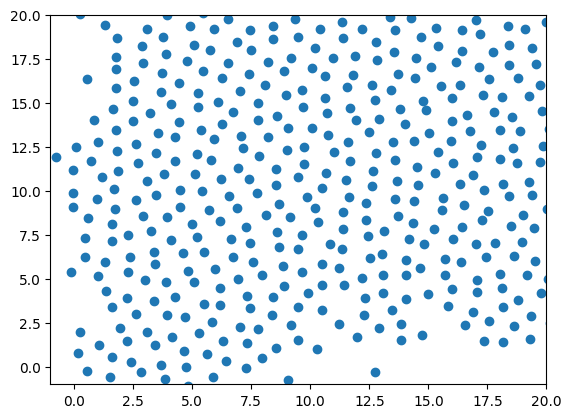

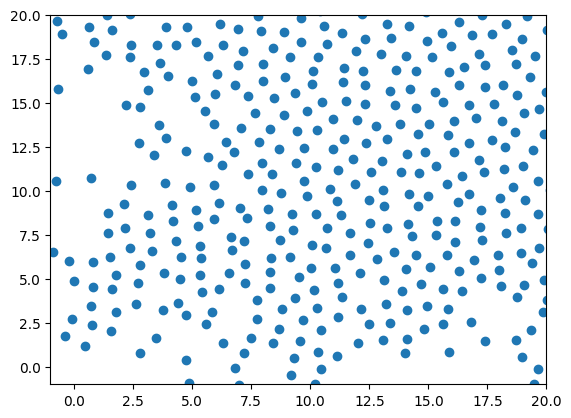

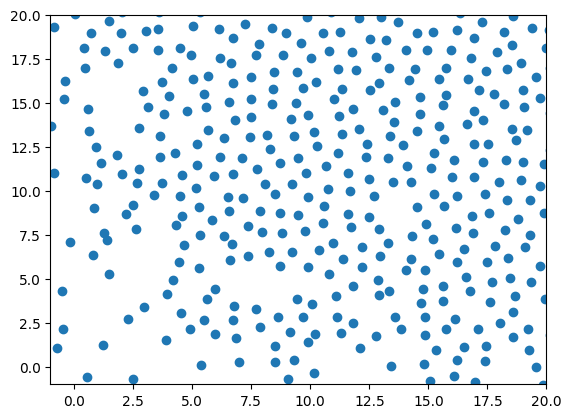

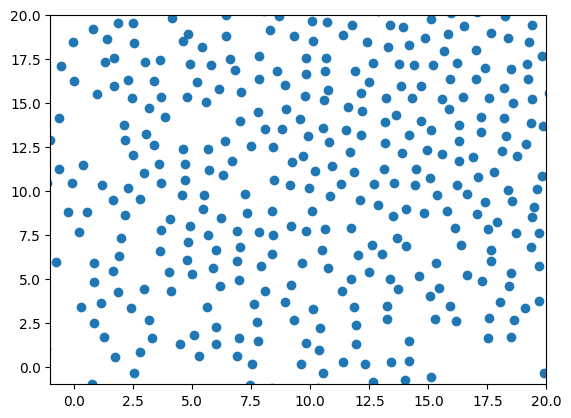

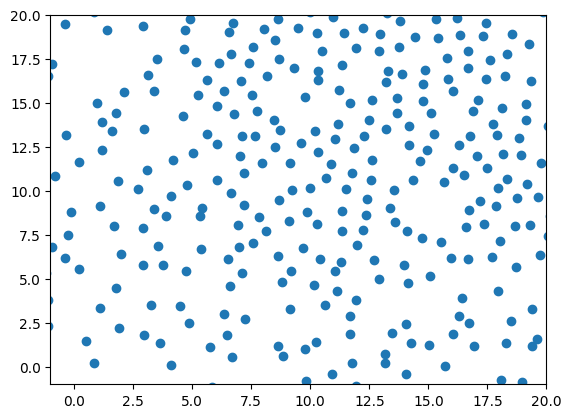

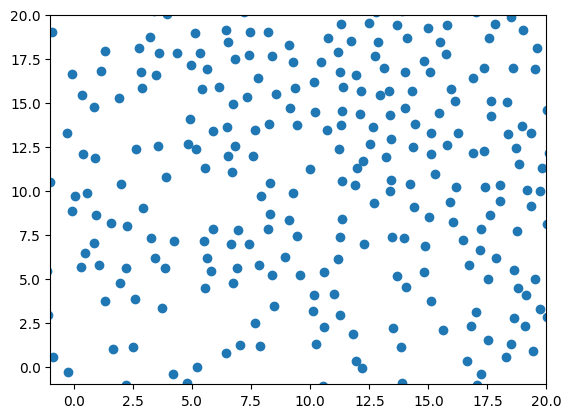

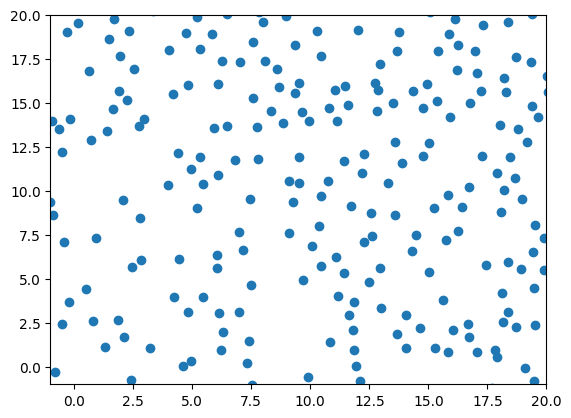

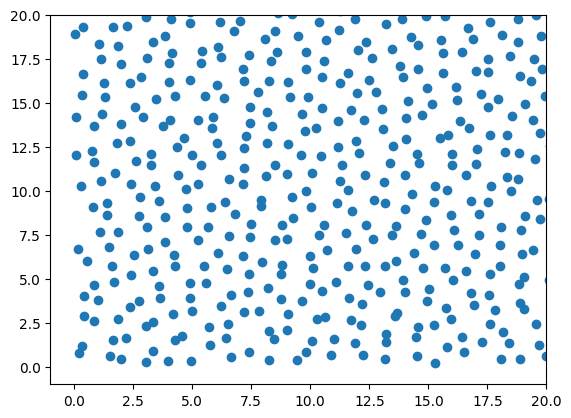

In [ ]:
for v0 in v0s:
    timestamps, arr = get_data_from_npy(rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_3.npy")

    fig, ax = plt.subplots()
    def update(frame):
        ax.clear()
        ax.plot(arr[frame,:,0], arr[frame,:,1], 'o')
        ax.set_xlim(-1, 20)
        ax.set_ylim(-1, 20)
    #timestamps doesnt increase linearly, its actually exponentially spaced. can the video speed be adjusted accordingly?
    # Calculate the time differences between consecutive timestamps
    time_diffs = np.diff(timestamps)
    # Adjust the interval based on the time differences
    adjusted_intervals = [interval * (diff / np.mean(time_diffs)) for diff in time_diffs]
    ani = animation.FuncAnimation(fig, update, frames=len(timestamps), interval=20)
    ani.save(f'particle_positions_{v0}.gif', writer='imagemagick')




In [7]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

v0s = ["0.10","0.15","0.20","0.25","0.30","0.35","0.40","0.45"]
base_interval_s = 0.02  # average frame time in seconds (was 20 ms)

for v0 in v0s:
    timestamps, arr = get_data_from_npy(rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_3.npy")

    # render frames to RGB arrays
    frames = []
    fig, ax = plt.subplots(figsize=(5,5))
    for frame in range(len(timestamps)):
        ax.clear()
        ax.plot(arr[frame,:,0], arr[frame,:,1], 'o')
        ax.set_xlim(-1,20); ax.set_ylim(-1,20)
        fig.canvas.draw()
        w, h = fig.canvas.get_width_height()
        buf = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8).reshape(h, w, 4)
        img = buf[:, :, :3].copy()
        frames.append(img)
    plt.close(fig)

    imageio.mimsave(f'particle_positions_try2_{v0}.gif', frames, duration=timestamps)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [3]:
time_scale = 1.0  # <--- adjust playback speed here (e.g. 0.2 = 5× faster)

for v0 in v0s:
    timestamps, arr = get_data_from_npy(
        rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_3.npy"
    )

    # scaled per-frame durations
    dt = np.diff(timestamps)
    durations = dt * time_scale
    durations = np.append(durations, durations[-1])  # match frame count

    frames = []
    fig, ax = plt.subplots(figsize=(5, 5))

    for frame in range(len(timestamps)):
        ax.clear()
        ax.plot(arr[frame, :, 0], arr[frame, :, 1], 'o')
        ax.set_xlim(-1, 20)
        ax.set_ylim(-1, 20)

        fig.canvas.draw()
        w, h = fig.canvas.get_width_height()
        buf = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
        buf = buf.reshape(h, w, 4)
        frames.append(buf[:, :, :3].copy())

    plt.close(fig)

    imageio.mimsave(
        f'particle_positions_try2_{v0}.gif',
        frames,
        duration=durations.tolist()
    )


NameError: name 'imageio' is not defined